1. Un punct material se deplaseaz  pe axa real  dintr-un nod spre un nod vecin, la  ecare pas,
cu probabilitatea p ∈ (0, 1) la dreapta ³i cu probabilitea 1 − p la stânga. Nodurile sunt centrate în
numerele întregi, iar nodul iniµial este 0:
b) Simulaµi de 1000 ori o astfel de deplasare cu un num r dat de pa³i, cu probabilitatea p ∈ (0, 1),
³i a ³aµi histograma poziµiilor  nale.

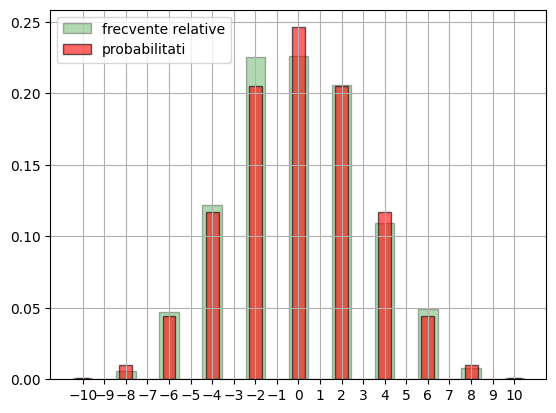

In [34]:
from scipy.stats import bernoulli, binom
from matplotlib.pyplot import bar, show, hist, grid, legend, xticks
nr_sim = 1000
nr_pasi = 10
# problema 1 a
def mers_aleator_axa(nr_pasi,p):
    pozitii = [0]
    for _ in range(nr_pasi):
        x = bernoulli.rvs(p)
        pas = 2*x-1
        pozitii.append(pozitii[-1]+pas)
    return pozitii


# problema 1 b
def sim_mers_aleator_axa(nr_pasi,p,nr_sim):
    pozitii_finale = [mers_aleator_axa(nr_pasi,p)[-1] for _ in range(nr_sim)]
    bin_edges = [i+0.5 for i in range(-nr_pasi-1,nr_pasi+1)]
    hist(pozitii_finale,bin_edges,density=True,rwidth=0.9,align='mid',edgecolor='black',
                                        color='green',alpha=0.3,label="frecvente relative")

    distribution = dict([(k-(nr_pasi-k),binom.pmf(k,nr_pasi,p))
                                                for k in range(nr_pasi+1)])
    bar(distribution.keys(), distribution.values(), width = 0.6,align='center',
                                        color = 'red', edgecolor = 'black',alpha= 0.6, label = 'probabilitati')
    xticks(range(-nr_pasi,nr_pasi+1))
    legend(loc = 'upper left')
    grid()
    show()

sim_mers_aleator_axa(nr_pasi,0.5,nr_sim)

2.
Un juc tor de  Loto 6/49  î³i cump r  câte un bilet pentru  ecare extrage efectuat  de loteria
român  pân  când reu³e³te s  nimereasc  un bilet cu cel puµin 3 numere câ³tig toare. Folosind
metodele claselor de mai jos,
i) generaµi o list  care conµine, pentru  ecare simulare, num rul de bilete necâ³tig toare (care au cel
mult 2 numere câ³tig toare) pân  la primul bilet câ³tig tor (care are cel puµin 3 numere câ³tig toare).
ii) estimaµi probabilitatea evenimentului  cel puµin 10 bilete succesive sunt necâ³tig toare pân  când
juc torul nimere³te un bilet câ³tig tor  , apoi a s,at, i valoarea teoretic  corespunz toare.

In [38]:
from scipy.stats import hypergeom, geom

nr_sim = 1000
p = sum([hypergeom.pmf(k,49,6,6) for k in range(3,7)])
nr_bile_necastigatoare = geom.rvs(p,size=nr_sim)
nr_bile_necastigatoare


array([ 53,  32,  45,  95,  42,   2,  38,  12,  43,  48,  29,  22,  10,
        22, 141,  42,  76,  30,  38,  60,  67,  63,  41, 133, 103,  80,
        20,   1,  25, 107,  24,  30,  43,  25,  38, 101,  13,  34,  26,
        14,  33,  14,  70,   1,  37,  29,  90,  71, 229,   4,  36,  44,
       128,  69,  17, 400, 135,  15,  12,  27,  24,  89,  32, 103,  84,
        55,  22,  33,  10,  10,  42,   4,  38,   2, 103,  11,  51, 291,
        79,   7,  14,  37,  10, 214,  33,  92,  41,  31,  11,  20,  11,
         2,  89,  16,  51,  25,  72,  42,  16, 148,   1,  13,  27,   3,
        30,  46,  43,   2,  22,  98,  78,  79,  27,  39,  26,   4,  37,
        49,  88,  41,  79,  43,  41,  48, 139, 152,  45,   7,   5,   4,
        53,  22,  26,   8,  79,  48,  26,  26,  23,   9, 176,  28,   6,
        39,   3,   9,  20,  43,  74,  11,  38,  76,  19,   4, 108,  14,
        51, 124,  12, 166,  36,  83,  22,   7,  37,   8, 103,  45, 128,
        16,  58,  28, 150, 130,  24,  28,   9,  19, 125,  78,  5